In [2]:
# Load in libraries

import warnings
warnings.filterwarnings('ignore')

#libraries for handling data
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

#label encoders
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


#libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
sns.set_palette('Set2')

#libaries for modelling
# Regression Modelling Algorithms
import statsmodels.api as sm
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor


In [3]:
#train = pd.read_csv("/Users/reejungkim/Documents/Git/Kaggle---House-Price/train.csv", index_col=0)
train = pd.read_csv("https://raw.githubusercontent.com/reejungkim/HousingPrice/master/train.csv", error_bad_lines=False)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#test = pd.read_csv('/Users/reejungkim/Documents/Git/Kaggle---House-Price/test.csv', index_col=0)
test = pd.read_csv("https://raw.githubusercontent.com/reejungkim/HousingPrice/master/test.csv", error_bad_lines=False)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test.shape, train.shape

((1459, 80), (1460, 81))

train.describe().transpose()

In [6]:
all_data = pd.concat((train,test))

In [7]:
all_data.shape

(2919, 81)

## EDA

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

#### columns with highest missing value portions

In [9]:
(all_data.isnull().sum()/ len(all_data)).sort_values(ascending=False)[:30]

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
FireplaceQu     0.486468
LotFrontage     0.166495
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageYrBlt     0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
Functional      0.000685
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
Utilities       0.000685
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
SaleType        0.000343
Electrical      0.000343
GarageCars      0.000343
TotalBsmtSF     0.000343
dtype: float64

#### colums whose missing portions are greater than 80%

In [10]:
df_null = pd.DataFrame((all_data.isnull().sum()/ len(all_data)), columns={"%missing"})
df_null.loc[df_null['%missing']>=.8]

,%missing
Alley,0.932169
PoolQC,0.996574
Fence,0.804385
MiscFeature,0.964029


#### Question: Should we drop and not use the data where there're more than 80% of data missing(NA)?
Per data description, the NA for those four features above means zero (0) instead of missing. So, we should NOT drop them at this stage.

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
       

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
       
       
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None


# handling null values

In [11]:
# Null values of Electrical and Total BsmtSF would be replaced by mode
for col in ['Electrical', 'RoofStyle', 'Neighborhood']:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

all_data.loc[pd.isnull(all_data.LotFrontage)]

In [13]:
#all_data.iloc[:,all_data.dtypes==object]
a = all_data.select_dtypes(include=['object']).columns
a

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
#replace all null values to 0
for col in a:
    all_data[col] = all_data[col].fillna('None')

In [15]:
b = all_data.select_dtypes(include=['int64', 'float64']).columns
b

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
all_data['LotFrontage'].dtype

dtype('float64')

In [17]:
# Null values of rest of numerical types variables would better be replaced by median of neighborhood group
for col in b:
    all_data[col] = all_data.groupby('Neighborhood')[col].transform( lambda x: x.fillna(x.median()))
 

In [18]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [19]:

#import plotly.graph_objs as go
%matplotlib inline

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


df = all_data.copy()

tracex = go.Scatter(
    name = 'sale Price',
   mode = 'markers',
   x = list(df['YrSold']),
   y = list(df['SalePrice']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

data = [tracex ]

layout = dict(title='Price Estimation Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)


fig1 = py.offline.iplot(figure)
#plt.show()

tracex = go.scatter(
    name = 'sale Price',
   mode = 'markers',
   x = list(df['YrSold']),
   y = list(df['SalePrice']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

tracex.show()

fig2 = px.area(df, x="YrSold", y="SalePrice", color="PoolQC", line_group="PoolArea")
fig2.show()

fig3 = px.bar(df, x="YrSold", y="SalePrice", color="SaleCondition", barmode="group")
fig3.show()

#fig2.write_html("fig2.html")
py.offline.plot(fig3, filename='myplot.html')

with open('p_graph.html', 'a') as f:
    f.write(fig2.to_html(full_html = False, include_plotlyjs = 'cdn'))
    f.write(fig3.to_html(full_html = False, include_plotlyjs = 'cdn'))

with open('p_graph.html', 'a') as f:
    f.write( py.offline.plot(f1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))


# vectorization/ Encoding

In [20]:
for col in a:
    print('{}: {}'.format(col, all_data[col].unique()  ))

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH' 'None']
Street: ['Pave' 'Grvl']
Alley: ['None' 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa' 'None']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


In [21]:
#x = le.fit_transform(all_data['Alley'].unique())
#y = le.inverse_transform(x)
#list(x), list(y)

In [22]:
#Encoding object type variables using label encoder
for col in a:
    all_data[col] = le.fit_transform(all_data[col])

In [23]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,9,4,208500.0
1,2,20,4,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,9,4,181500.0
2,3,60,4,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,9,4,223500.0
3,4,70,4,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,9,0,140000.0
4,5,60,4,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,9,4,250000.0


In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   int64  
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Scaler

In [25]:
#choose scaler
scaler = RobustScaler()

In [33]:
#scaler application
scaled_X = scaler.fit_transform(all_data.loc[:, all_data.columns!='SalePrice'].reset_index(drop=True))
scaled_Y = scaler.fit_transform( all_data[0:1460][['SalePrice']] )  

In [35]:
norm = Normalizer()
scaled_X = norm.fit_transform(scaled_X)
scaled_Y = norm.fit_transform(scaled_Y)

In [36]:
scaled_Y

array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [ 1.],
       [-1.],
       [-1.]])

<AxesSubplot:ylabel='Density'>

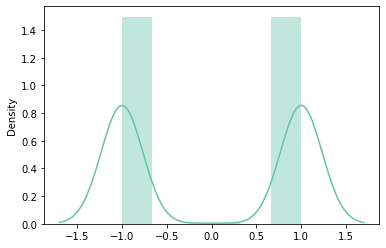

In [37]:
sns.distplot(scaled_Y)

# set x_train, y_train, x_test, and y_test

In [38]:
x_train = scaled_X[0:1460]
y_train = scaled_Y[0:1460]
x_test = scaled_X[1460::]
y_test = scaled_Y[1460::]

In [39]:
#linear regression
#lm = LinearRegression()
#lm.fit(x_train, y_train)
#y_pred_lm = lm.predict(x_test)
#lm.score(x_train, y_train) 


lm = sm.OLS(y_train, x_train).fit() ## sm.OLS(output, input)
y_pred_lm = lm.predict(x_test)

# Print out the statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.578
Model:                            OLS   Adj. R-squared (uncentered):              0.553
Method:                 Least Squares   F-statistic:                              23.90
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                   4.95e-204
Time:                        01:55:04   Log-Likelihood:                         -1440.6
No. Observations:                1460   AIC:                                      3039.
Df Residuals:                    1381   BIC:                                      3457.
Df Model:                          79                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1634      0.456     -0.358      0.720      -1.058       0.731
x2            -0.1766      0.439     -0.402      0.688      -1.038       0.685
x3            -0.7867      0.229     -3.436      0.001      -1.236      -0.338
x4             0.0939      0.195      0.481      0.631      -0.289       0.477
x5             0.4297      0.190      2.258      0.024       0.056       0.803
x6             1.5146      4.909      0.309      0.758      -8.116      11.145
x7             0.8008      0.865      0.926      0.355      -0.896       2.498
x8            -0.5183      0.302     -1.716      0.086      -1.111       0.074
x9            -0.2592      0.269     -0.962      0.336      -0.788       0.269
x10         -441.4477    284.072     -1.554      0.120    -998.708     115.812
x11            0.1340      0.187      0.716      0.474      -0.233       0.501
x12            0.0188      0.871      0.022      0.983      -1.691       1.728
x13           -0.2016      0.245     -0.824      0.410      -0.682       0.278
x14           -0.0163      0.187     -0.087      0.931      -0.384       0.351
x15           -0.8735      0.933     -0.936      0.349      -2.704       0.957
x16           -0.1334      0.279     -0.479      0.632      -0.680       0.413
x17            0.2081      0.391      0.533      0.594      -0.558       0.974
x18            0.7469      0.421      1.773      0.076      -0.080       1.573
x19            0.1897      0.208      0.913      0.362      -0.218       0.597
x20            0.7745      0.843      0.918      0.359      -0.880       2.429
x21            0.0876      0.526      0.167      0.868      -0.944       1.119
x22           -0.1518      0.195     -0.780      0.436      -0.534       0.230
x23            0.5950      0.444      1.341      0.180      -0.275       1.465
x24           -0.7109      0.458     -1.553      0.121      -1.609       0.187
x25            0.8119      0.492      1.652      0.099      -0.152       1.776
x26            0.1988      0.246      0.807      0.420      -0.285       0.682
x27            0.0040      0.185      0.021      0.983      -0.358       0.366
x28           -0.0842      0.370     -0.228      0.820      -0.810       0.641
x29           -0.0930      0.247     -0.376      0.707      -0.578       0.392
x30            0.3226      0.377      0.855      0.393      -0.418       1.063
x31            0.0089      0.385      0.023      0.982      -0.745       0.763
x32            0.1672      0.202      0.826      0.409      -0.230       0.564
x33           -0.0836      0.137     -0.610      0.542      -0.352       0.185
x34            0.0328      0.332      0.099      0.921      -0.618       0.684
x35            0.4086      0.563      0.726      0.468      -

In [40]:
#random forest regression
randomForest = RandomForestRegressor()
randomForest.fit(x_train, y_train)
y_pred_randomForest = randomForest.predict(x_test)

print("Train score: %0.3f" % randomForest.score(x_train, y_train) )

Train score: 0.962


In [41]:
#support vector regression
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

print("Train score: %0.3f" % svr.score(x_train, y_train) )

Train score: 0.578


In [42]:
#gradient boosting regression
gradientBoosting = GradientBoostingRegressor()
gradientBoosting.fit(x_train, y_train)
y_pred_gradBoost = gradientBoosting.predict(x_test)

print("Train score: %0.3f" % gradientBoosting.score(x_train, y_train))

Train score: 0.876


In [43]:
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV

# First create the base model to tune
rfr = RandomForestRegressor() #RandomForestRegressor()


# Number of trees in random forest
n_estimators = [3000] #[int(x) for x in np.linspace(start = 500, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['sqrt'] #['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [6, 8 , 10]#[int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [8, 12, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [8, 16, 20]
# Method of selecting samples for training each tree
bootstrap = [True] #[True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr, 
                               param_distributions = random_grid, 
                               #n_iter = 5, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)


#clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5,n_jobs=-1, verbose=1)

In [44]:
# Fit the random search model
rfr_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [6, 8, 10],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [8, 16, 20],
                                        'min_samples_split': [8, 12, 20],
                                        'n_estimators': [3000]},
                   random_state=42, verbose=2)

In [45]:
rfr_random.score(x_train, y_train)

0.8193492624010579

In [46]:
y_pred = rfr_random.predict(x_test)

In [47]:
rfr_random.score(x_test, y_pred)

1.0

In [48]:
y_train_pred = rfr_random.predict(x_train)
y_train_pred_inversed = scaler.inverse_transform(y_train_pred.reshape(-1,1))

from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_train, y_train_pred_inversed))

MAE 163064.97474705617


In [49]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_train, y_train_pred_inversed))

MSE 30856184095.35716


In [50]:
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE", mean_absolute_percentage_error(y_train, y_train_pred_inversed))

MAPE 1.939659780422149e+18


from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred_inversed)
print(r2)

In [51]:
rfr_random.best_params_

{'n_estimators': 3000,
 'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 8,
 'bootstrap': True}

# inverse scaler

In [52]:
# predictions
y_pred = rfr_random.predict(x_test)
y_pred

array([-0.89855866, -0.15157953,  0.556511  , ..., -0.38066555,
       -0.67647519,  0.88323763])

y_pred = y_pred_randomForest

In [53]:
y_new_inverse = scaler.inverse_transform(y_pred.reshape(-1,1))

In [54]:
y_new_inverse

array([[ 87498.60895541],
       [150263.52986475],
       [209760.83711131],
       ...,
       [131014.57727648],
       [106159.17214214],
       [237214.04174636]])

In [55]:
y_new_inverse = np.squeeze(y_new_inverse)

In [56]:
y_new_inverse.shape

(1459,)

In [57]:
all_data.reset_index()['Id'][1460::].values.shape

(1459,)

In [58]:
Id = (all_data.reset_index()['Id'][1460::]).values
result = pd.DataFrame( { 'Id': Id , 'SalePrice': y_new_inverse} )

In [59]:
result

,Id,SalePrice
0,1461,87498.608955
1,1462,150263.529865
2,1463,209760.837111
3,1464,227964.644696
4,1465,215116.544335
...,...,...
1454,2915,81782.996550
1455,2916,80998.433527
1456,2917,131014.577276
1457,2918,106159.172142


In [60]:
#Export result as a csv file
import os
os.getcwd()

result.to_csv( 'Submission.csv' , index = False )

# check feature importance

In [61]:
features = all_data.loc[:, all_data.columns!='SalePrice'].columns
importances = randomForest.feature_importances_

<AxesSubplot:>

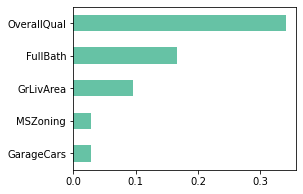

In [62]:
feat_importances = pd.Series(importances, index=features)

#feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 20))
#feat_importances.nlargest(5).sort_values(ascending=True).plot(kind='barh')
feat_importances.nlargest(5).sort_values(ascending=True).plot(kind='barh', figsize=(4, 3))

In [63]:
dfFeatures = pd.DataFrame(feat_importances.nlargest(5), columns=['importance'])
dfFeatures

,importance
OverallQual,0.340862
FullBath,0.166335
GrLivArea,0.095093
MSZoning,0.029095
GarageCars,0.028749


# feature importance using SHAP

In [64]:
import shap

model = rfr_random.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

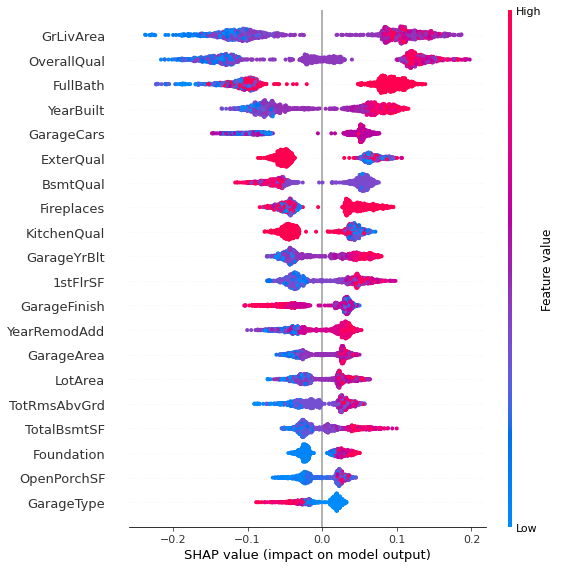

In [65]:
shap.summary_plot(shap_values, 
                  features=x_train, 
                  feature_names=all_data.loc[:, all_data.columns!='SalePrice'].columns)

# feature importance usng LIME

In [66]:

import lime
import lime.lime_tabular


# LIME has one explainer for all models
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, 
    feature_names= all_data.loc[:, all_data.columns!='SalePrice'].columns ,
    class_names=["SalePrice"],
#    categorical_features = categorical_features,
    verbose=True,
    mode="regression")


In [67]:
#Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(x_test[j], model.predict, num_features=6)

Intercept -0.18201358188120226
Prediction_local [-0.13897331]
Right: 0.8578987765509843


In [68]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [69]:
exp.as_list()

[('GrLivArea > 0.04', 0.13855191932725147),
 ('-0.01 < OverallQual <= 0.00', -0.10994414396765721),
 ('BsmtQual <= 0.00', 0.0864638012152909),
 ('1stFlrSF <= -0.03', -0.06842070199442511),
 ('TotalBsmtSF <= -0.03', -0.06337784373788026),
 ('0.00 < YearBuilt <= 0.09', 0.05976724468911205)]

In [70]:

import random

idx = random.randint(1, len(x_test))

print("Prediction : ", model.predict(x_test[idx].reshape(1,-1)))
#print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(x_test[idx], model.predict, num_features=len(all_data.loc[:, all_data.columns!='SalePrice'].columns))
explanation


explanation.show_in_notebook()

Prediction :  [-0.92588661]
Intercept 0.009028262687728106
Prediction_local [-0.69247999]
Right: -0.925886608835368


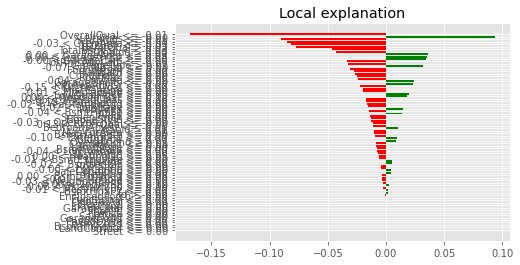

In [71]:
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

In [72]:
explanation.as_list()

[('OverallQual <= -0.01', -0.1683185933584942),
 ('Utilities <= 0.00', 0.09338994790272608),
 ('YearBuilt <= -0.01', -0.0906089775129367),
 ('-0.03 < GrLivArea <= 0.00', -0.08480957399639576),
 ('1stFlrSF <= -0.03', -0.08125128454432605),
 ('BsmtQual > 0.03', -0.0775647164851491),
 ('TotalBsmtSF <= -0.03', -0.046160805775074566),
 ('MSZoning > 0.00', -0.043272665996724795),
 ('0.00 < GarageArea <= 0.03', 0.0363006735405286),
 ('0.00 < GarageYrBlt <= 0.08', 0.035328868242748036),
 ('-0.00 < GarageCars <= 0.00', 0.03426675255823468),
 ('TotRmsAbvGrd <= -0.00', -0.033863435235405505),
 ('GarageType > 0.01', -0.03277785549840062),
 ('-0.07 < FullBath <= 0.00', 0.031958924245541157),
 ('Foundation <= 0.00', -0.030963686832813565),
 ('HalfBath <= 0.00', -0.027168881434364203),
 ('Condition2 <= 0.00', -0.026461251655835977),
 ('RoofMatl <= 0.00', -0.024483915101552244),
 ('-0.04 < LotArea <= 0.00', -0.02413880594665717),
 ('GarageFinish <= -0.00', 0.023814226100637482),
 ('KitchenAbvGr <= 0.0